# TP Prédiction et clustering

# Partie 1 : Filtre de Kalman

Dans cette partie nous allons implémenter un filtre de Kalman pour prédire la trajectoire et la vélocité d'un objet en déplacement dans le plan 2D. Dans cet exercice, un objet dans le plan 2D reçoit une impulsion aléatoire à intervalle régulier. L'objet suivit est par ailleurs également freiné par des forces de frottement. Enfin, le mouvement de l'objet induit un mélange de l'information reçu par les capteurs ce qui est modélisé par une matrice de mélange $\boldsymbol C$. Les équations d'état ont la forme suivante:

$$\begin{equation}
        \begin{cases}
          x_{t+1} & = \boldsymbol A \boldsymbol x_t + \boldsymbol u_t + \boldsymbol w_t \\ 
          y_{t+1} & = \boldsymbol C \boldsymbol x_t + \boldsymbol n_t  \notag
        \end{cases}       
\end{equation}$$

Le vecteur $\boldsymbol x = [p_x,p_y,v_x,v_y]$ contient la position de l'objet et sa véloicité. La matrice $\boldsymbol A$ représente le déplacement et le ralentissement de l'objet entre deux intervalles de temps :

$$ \boldsymbol A \boldsymbol x = \begin{pmatrix} p^x_{t-1}+v^{x}_{t-1}\delta t \\ p^y_{t-1}+v^{y}_{t-1}\delta t \\ \eta v_{t-1}^x \\ \eta v_{t-1}^y\end{pmatrix} = \begin{pmatrix} 1 & 0 & \delta t & 0 \\ 0 & 1 & 0 & \delta t \\ 0 & 0 & \eta & 0 \\ 0 & 0 & 0 & \eta \end{pmatrix} \boldsymbol x$$
$\boldsymbol A \boldsymbol x$ donne donc l'évolution du vecteur $\boldsymbol x$ entre deux instants : pendant une durée $dt$, en partant d'un point $\boldsymbol p = (p_x,p_y)$ et avec une vitesse $\boldsymbol v = [v_x,v_y]$, on se déplace en une position $\boldsymbol p + \boldsymbol v\dot dt$. Le vecteur $\boldsymbol u_t$ représente l'impulsion donnée à l'objet qui se traduit par une modification aléatoire de la vitesse. Les vecteurs $\boldsymbol w_t$ et $\boldsymbol n_t$ sont des bruits d'état et de mesure respectivement. On les suppose distribués selon une loi normale centrée normée. 

Le filtre de Kalman consiste à estimer tout d'abord l'état en cours à partir des $t-1$ observation:

$$\begin{align}
            &\boldsymbol x_{t|t-1} = \boldsymbol A \boldsymbol x_{t-1|t-1} + \boldsymbol u_t \notag \\
            &\boldsymbol \Gamma_{t|t-1} = \boldsymbol A \boldsymbol \Gamma_{xt-1|t-1} \boldsymbol A^T + \boldsymbol \Gamma_w \notag
        \end{align}$$
Puis à calculer les innovations en prenant en compte l'instant courrant (on ne prend que l'information que l'on n'aurait pas pu estimer = nouveauté) :

$$ \hat{\boldsymbol y } = \boldsymbol y - \boldsymbol C \boldsymbol x_{t|t-1}$$

$$\boldsymbol S_t = \boldsymbol C \boldsymbol \Gamma_{t|t-1} \boldsymbol C^T + \boldsymbol \Gamma_n \notag$$

La prédiction à $t$ est donnée par

$$ \boldsymbol x_{t|t} = \boldsymbol x_{t|t-1} + \boldsymbol K_t (\boldsymbol y - \boldsymbol C \boldsymbol x_{t|t-1})$$


$$\boldsymbol \Gamma_{t|t} = (\boldsymbol I - \boldsymbol K_t  \boldsymbol C) \boldsymbol \Gamma_{t|t-1}$$

où le gain de Kalman est donné par:

$$\boldsymbol K_t = \boldsymbol \Gamma_{t|t-1}\boldsymbol C^T\boldsymbol S_t^{-1}$$


In [ ]:
pip install numpy==1.23.5 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


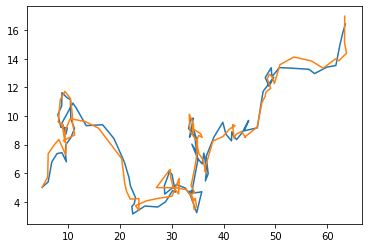

In [ ]:
I = np.eye(4)

mu = 0.75
iter = 100
x = [5,5,2,2]
y = [3,3,0,0]
dt = 0.3
A = np.array([ [1,0,dt,0],[0,1,0,dt], \
              [0,0,mu,0],[0,0,0,mu]])
u = np.array([0,0,0,0])
Sigma_w = 0.5*np.eye(4)
traj = np.zeros((4,iter))
traj[:,0] = x


#a1 = np.array([-1,-1])
#a2 = np.array([-4,-4])

C = np.array([ [1,0,-0.2,0.7],[0,1,0.3,0.3], \
             [0,0,1,-0.1],[0,0,1,0.25]])
Sigma_n = 0.5*np.eye(4)

mesures = np.zeros((4,iter))
mesures[:,0] = y

Gamma_corr = np.eye(4)
x_corr = x
traj_pred = np.zeros((4,iter))
traj_pred[:,0] = x_corr

for t in range(1,iter):
  w = np.random.multivariate_normal(np.zeros(4),Sigma_w)
  x = A@x + u + w
  traj[:,t] = x

  # Mesures
  n = np.random.multivariate_normal(np.zeros(4),Sigma_n)
  y = C@x + n
  mesures[:,t] = y

  # Prediction
  # <----------------- Your code ------------>
  x_est = None
  Gamma_est = None

  #Correction
  # <----------------- Your code ------------>
  innovation = None
  S = None
  K = None
  x_corr = None
  Gamma_corr = None
  traj_pred[:,t] = x_corr

  if t%10==0:
    u = np.array([0,0,np.random.randint
                  (0,10),np.random.randint
                  (0,10)]) + 0.3*np.random.normal()
  else:
    u = np.array([0,0,0,0])


plt.subplot()
plt.plot(traj[0],traj[1])
plt.subplot()
plt.plot(traj_pred[0],traj_pred[1])
#plt.subplot()
#plt.plot(mesures[0],mesures[1])

# Partie 2 : Clustering

Cette partie vise d'une part à prendre en main la bibliothèque TSLearn et, d'autre part, à comparer le pouvoir représentatif de deux métrique : la distance euclidienne et le *Dynamic Time Waring* (DTW). 


In [ ]:
!python -m pip install tslearn

     |████████████████████████████████| 798kB 5.1MB/s eta 0:00:01


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Dans un premier temps nous allons créer un jeu de donné synthétique consistant en 3 classes de séries temporelles.

In [ ]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

Text(0.5, 1.0, 'Exemple 4')

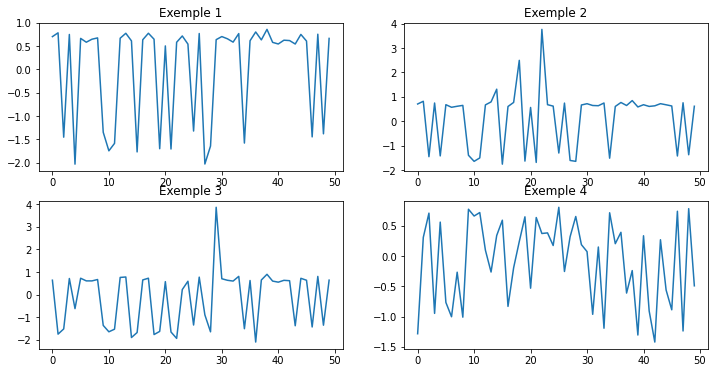

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs[0, 0].plot(X_train[:,0,0])
axs[0, 0].set_title('Exemple 1')
axs[0, 1].plot(X_train[:,7,0])
axs[0, 1].set_title('Exemple 2')
axs[1, 0].plot(X_train[:,8,0])
axs[1, 0].set_title('Exemple 3')
axs[1, 1].plot(X_train[:,23,0])
axs[1, 1].set_title('Exemple 4')

Nous allons à présent analyser les clusters calculés en se basant sur la distance euclidienne.

**Coding Task** : Analyser les fonctions TimeSeriesKMeans() et km.fit_predict() de [TSLearn](https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html#tslearn.clustering.TimeSeriesKMeans)  pour obtenir les centres de classes par KMeans en se basant sur la distance euclidienne.

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 


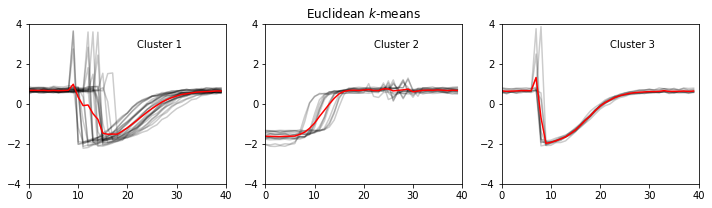

In [ ]:
# Euclidean k-means
print("Euclidean k-means")
# <!---- Your code here -------------------->
km = # Utiliser TimeSeriesKMeans(...)
y_pred = # Utiliser km.fit_predict(...)

plt.figure(figsize=(12, 10))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

Soft-DTW k-means


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.458 --> 0.458 --> 


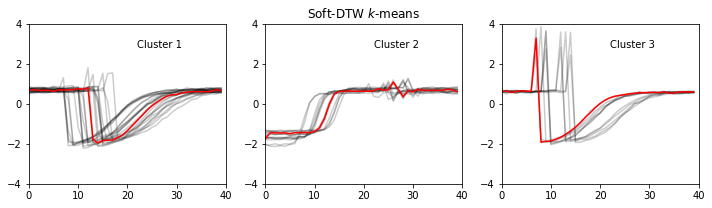

In [ ]:
print("Soft-DTW k-means")
# <!---- Your code here -------------------->
sdtw_km = #TimeSeriesKMeans(...)
y_pred = #sdtw_km.fit_predict(...)

plt.figure(figsize=(12, 10))
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")


**Question** : Selon vous, quelle mesure permet-elle d'avoir les centres de classes les plus représentatifs de leur cluster ?

# Partie 3 : Prédiction et RNN 

Dans cette partie nous allons faire de la prédiction en utilisant un RNN. Le but sera donc d'apprendre la réalisation t+1 à partir de la réalisation t.

Nous allons nous intéresser à un jeu de données de valeurs boursière que vous pouvez télécharger [ici](http://cedric.cnam.fr/~rambourc/AABA_2006-01-01_to_2018-01-01.csv).

In [ ]:
!wget -nc http://cedric.cnam.fr/~rambourc/AABA_2006-01-01_to_2018-01-01.csv -P dataset

In [ ]:
# First, we get the data
dataset = pd.read_csv('.dataset/AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset['Open'] -= min(dataset['Open'])
dataset['Open'] /= max(dataset['Open'])
dataset.head()

Open   High    Low  Close    Volume  Name
Date                                                     
2006-01-03  0.478567  41.22  38.79  40.91  24232729  AABA
2006-01-04  0.502503  41.90  40.77  40.97  20553479  AABA
2006-01-05  0.497966  41.73  40.85  41.53  12829610  AABA
2006-01-06  0.528473  43.57  42.80  43.21  29422828  AABA
2006-01-09  0.531915  43.66  42.82  43.42  16268338  AABA

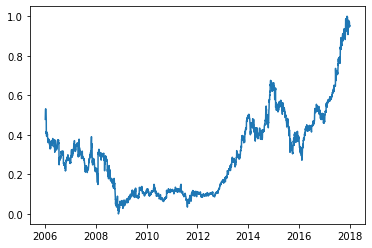

In [ ]:
plt.plot(dataset['Open'])

Séparons les donner pour mettre en place les jeux d'apprentissage et de test

In [ ]:
X_train = []
y_train = []
seq_learn = 20
seq_pred = 5
nb_train = 2520#int(len(dataset['Open'])*0.9)
for i in range(seq_learn,nb_train):
    X_train.append(dataset['Open'][i-seq_learn:i])
    y_train.append(dataset['Open'][i-seq_learn+1:i+1])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_test = []
y_test = []
nb_test = len(dataset['Open'])-nb_train-1
for i in range(nb_train+1,len(dataset['Open'])-seq_pred):
    X_test.append(dataset['Open'][i-seq_learn:i])
    y_test.append(dataset['Open'][i-seq_learn+1:i+1])
X_test, y_test = np.array(X_test), np.array(y_test)


Nous allons implémenter un modèle *seq2seq* constitué d'un encoder et d'un décodeur.

**Coding Task**: Implémenter l'encoder comme suit

* Une couche GRU de taille *input_size x hidden_size* avec *num_layers* nombre de couches. /!\ Attention, il faut s'assurer de mettre *batch_first=True* pour que la première dimension soit celle des batchs 

* Enfin, implémenter le *forward*

In [ ]:
class EncoderRNN(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,batch_size):
    super(EncoderRNN, self).__init__()
    self.num_layers = num_layers
    self.batch_size = batch_size
    self.hidden_size = hidden_size
    #<!------------- Your code here --------------->
    self.RNN = nn.GRU(...)

  def forward(self, input, hidden): # input [batch_size, length T, dimensionality d]      
      #<!------------- Your code here --------------->
      output, hidden = ...
      return output, hidden
  
  def init_hidden(self,device):
      #[num_layers*num_directions,batch,hidden_size]   
        return torch.zeros(self.num_layers, self.batch_size, self.hidden_size, device=device)

**Coding Task**: Implémenter à présent le decoder constitué de

* Une couche GRU de taille *input_size x hidden_size* avec *num_layers* nombre de couches. /!\ Attention, il faut s'assurer de mettre *batch_first=True* pour que la première dimension soit celle des batchs 

* Un couche complètement connectée de taille *hidden_size x fc_units* puis ReLu

* Un couche complètement connectée de taille *hidden_size x fc_units*

* Enfin, implémenter le *forward*

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,fc_units, output_size):
        super(DecoderRNN, self).__init__()
        #<!------------- Your code here --------------->
        self.gru = nn.GRU(...)
        self.fc = nn.Linear(...)
        self.out = nn.Linear(...)         
        
    def forward(self, input, hidden):
        #<!------------- Your code here --------------->
        output, hidden = ... # gru
        output = ... # relu(fc(...))
        output = ...  # out(...)
        return output, hidden

Enfin, il ne reste qu'à lier les deux modèles pour obtenir un modèle dit *seq2seq*. Le forward consiste alors à faire passer toutes les entrées dans l'encoder puis à transmettre le vecteur de contexte et la dernière entrée au décoder pour estimer les réalisations futures.

In [ ]:
class Seq2seq(nn.Module):
    def __init__(self, encoder, decoder, target_length, device):
        super(Seq2seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.target_length = target_length
        self.device = device
        
    def forward(self, x):
        input_length  = x.shape[1]
        encoder_hidden = self.encoder.init_hidden(self.device)
        for ei in range(input_length):
            encoder_output, encoder_hidden = self.encoder(x[:,ei:ei+1,:]  , encoder_hidden)
            
        decoder_input = x[:,-1,:].unsqueeze(1) # first decoder input= last element of input sequence
        decoder_hidden = encoder_hidden
        
        outputs = torch.zeros([x.shape[0], self.target_length, x.shape[2]]  ).to(self.device)
        for di in range(self.target_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_input = decoder_output
            outputs[:,di:di+1,:] = decoder_output
        return outputs      

Entraînons notre modèle :

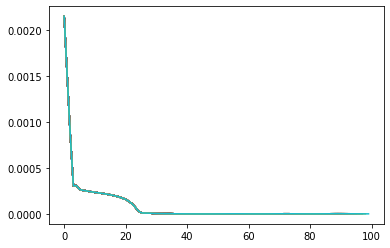

In [ ]:
batch_size = 100
encoder = EncoderRNN(input_size=1,hidden_size=10,num_layers=1,batch_size=batch_size)
decoder = DecoderRNN(input_size=1,hidden_size=10,num_layers=1,fc_units=10, output_size=1)
net = Seq2seq(encoder=encoder, decoder=decoder, target_length=seq_learn, device=device)
nb_batch = int(nb_train/batch_size)
nb_epoch = 100
learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)
criterion = torch.nn.MSELoss()
l = 0
running_loss = []
for n in range(nb_epoch):
  for i in range(nb_batch):
    X = torch.tensor(X_train[i*batch_size:(i+1)*batch_size,:]).unsqueeze(2).float().to(device)
    y = torch.tensor(y_train[i*batch_size:(i+1)*batch_size,:]).unsqueeze(2).float().to(device)
    y_est = net(X)
    loss=criterion(y_est,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    l+=loss.detach()
  
  running_loss.append(l/nb_batch/batch_size)
  plt.plot(running_loss)
  display.display(plt.gcf())
  display.clear_output(wait=True)
  #time.sleep(1)
  l = 0


Et testons ses capacités :

In [ ]:
gt=np.zeros((400,seq_learn))
pred=np.zeros((400,seq_learn))
for i in range(4):
  X = torch.tensor(X_test[i*batch_size:(i+1)*batch_size,:]).unsqueeze(2).float().to(device)
  y = torch.tensor(y_test[i*batch_size:(i+1)*batch_size]).float().to(device)
  y_est = net(X).detach().cpu().numpy().squeeze()
  pred[i*batch_size:(i+1)*batch_size,:] = y_est
  gt[i*batch_size:(i+1)*batch_size,:] = y

Text(0.5, 1.0, 'prédiction : 4 pas')

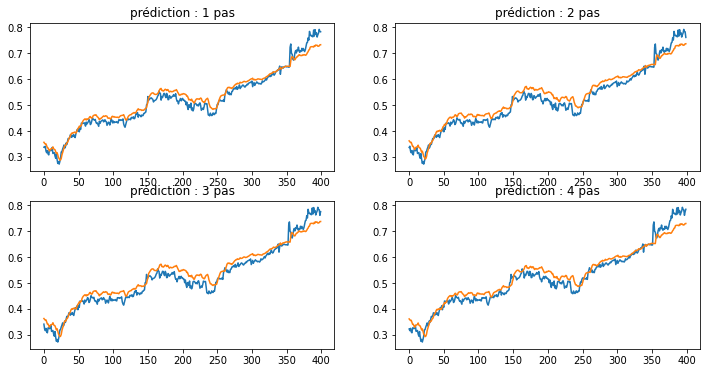

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs[0, 0].plot(gt[:,0])
axs[0, 0].plot(pred[:,0])
axs[0, 0].set_title('prédiction : 1 pas')
axs[0, 1].plot(gt[:,1])
axs[0, 1].plot(pred[:,1])
axs[0, 1].set_title('prédiction : 2 pas')
axs[1, 0].plot(gt[:,2])
axs[1, 0].plot(pred[:,2])
axs[1, 0].set_title('prédiction : 3 pas')
axs[1, 1].plot(gt[:,3])
axs[1, 1].plot(pred[:,3])
axs[1, 1].set_title('prédiction : 4 pas')

Comme vous pouvez le constater ce modèle généralise beaucoup mieux qu'un simple réseau récurrent et permet une meilleure prédiction en sortie.